In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
dataset = pd.DataFrame([[1000],[2000],[3000],[4000],[5000],[6000],[7000],[8000],[9000],[2000000000],[10000000000] ] , columns=['salary'])

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   salary  11 non-null     int64
dtypes: int64(1)
memory usage: 220.0 bytes


In [7]:
#Get the statistical summary of the numerical column

#Adjust the display setting for float value
pd.set_option('display.float_format','{:.2f}'.format)

dataset.describe()

,salary
count,11.00
mean,1090913181.82
std,3015111817.62
min,1000.00
25%,3500.00
50%,6000.00
75%,8500.00
max,10000000000.00


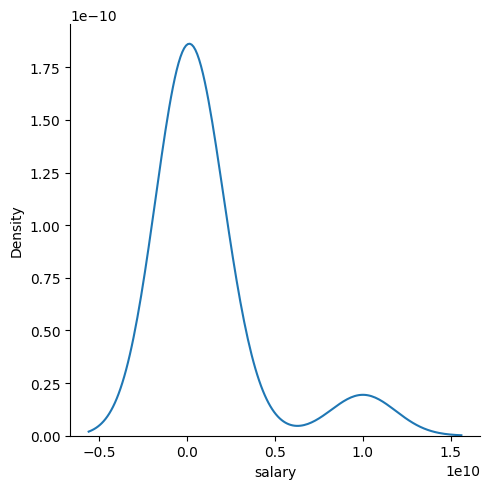

In [8]:
sns.displot(data=dataset['salary'] , kind='kde')

In [9]:
dataset['salary'].mean()

1090913181.8181818

In [23]:
np.percentile(dataset['salary'],[25,75])

array([3500., 8500.])

In [10]:
#Goal: Identify th extreme values and remove the same
# To identify the extreme value we need to identify the range
# To identify the range, we will use 1.5 IQR Rule

def outlierDetection(column):
  #1. Sort the data in ascending order
  sorted(column)
  #2. Calc Q1 and Q3
  Q1,Q3 = np.percentile(column, [25,75])

  #3.Calc IQR
  IQR = Q3 - Q1

  #4. Calc valid range
  lowerRange = Q1 - (1.5 * IQR)
  upperRange = Q3 + (1.5 * IQR)

  return lowerRange,upperRange

In [11]:
lr,ur = outlierDetection(dataset['salary'])

In [12]:
lr

-4000.0

In [13]:
ur

16000.0

In [14]:
#Delete Outliers

processedData = dataset[ (dataset['salary'] >= lr) & (dataset['salary'] <= ur) ]

In [28]:
processedData

,salary
0,1000
1,2000
2,3000
3,4000
4,5000
5,6000
6,7000
7,8000
8,9000


In [15]:
processedData.describe()

,salary
count,9.00
mean,5000.00
std,2738.61
min,1000.00
25%,3000.00
50%,5000.00
75%,7000.00
max,9000.00


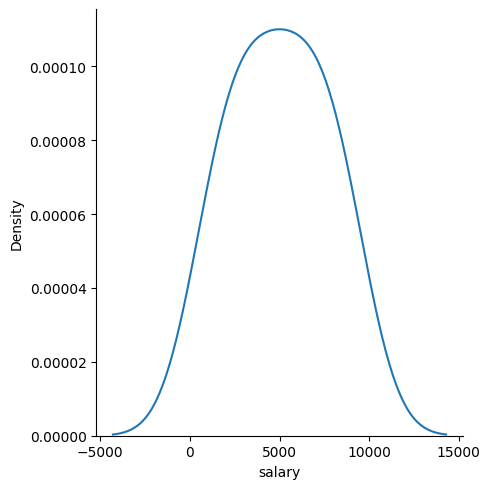

In [16]:
sns.displot(data=processedData['salary'] , kind='kde')

In [18]:
processedData['salary'].mean()

5000.0

In [19]:
processedData

,salary
0,1000
1,2000
2,3000
3,4000
4,5000
5,6000
6,7000
7,8000
8,9000


In [26]:
Dataset = pd.DataFrame([[1000],[2000],[3000],[4000],[5000],[6000],[7000]], columns=['Earnings'])

In [27]:
Dataset

,Earnings
0,1000
1,2000
2,3000
3,4000
4,5000
5,6000
6,7000
